# Project 1: Regression on real estate market - Kings County

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re

## Read the file and check the data

In [2]:
df = pd.read_csv("data/King_County_House_prices_dataset.csv", na_values="?")
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# drop "id" column
df.drop("id", inplace=True, axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [26]:
print("hopefully no negatives")
print(df.min())
print("----")
print("here max values")
print(df.max())

hopefully no negatives
date             1/10/2015
price                78000
bedrooms                 1
bathrooms              0.5
sqft_living            370
sqft_lot               520
floors                   1
waterfront               0
view                     0
condition                1
grade                    3
sqft_above             370
sqft_basement            0
yr_built              1900
yr_renovated             0
zipcode              98001
lat                47.1559
long              -122.519
sqft_living15          399
sqft_lot15             651
dtype: object
----
here max values
date             9/9/2014
price             7.7e+06
bedrooms               33
bathrooms               8
sqft_living         13540
sqft_lot          1651359
floors                3.5
waterfront              1
view                    4
condition               5
grade                  13
sqft_above           9410
sqft_basement        4820
yr_built             2015
yr_renovated         2015
zipcode     

In [25]:
print(f"Length: {len(df)}")
print(f"Shape: {df.shape}")

Length: 21597
Shape: (21597, 20)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(10), object(1)
memory usage: 3.3+ MB


In [6]:
# missing check
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

,Number,Percentage
waterfront,2376,11.0
view,63,0.3
sqft_basement,454,2.1
yr_renovated,3842,17.8


Four of the columns have missings:
- "yr_renovated" could be missing cause it has not been renovated jet
- "view" is unimportant because the percentage is low,
- "waterfront" will be transformed to 0.0 cause, if there where a waterfront
- "sqft_basement" missings will be ignored

In [ ]:
# all elem in list are pot features, but "sqft_basement" has to be transformed
pot_features = list(df.columns)
pot_features

### Playground

In [ ]:
print(f"Length: {len(df)}")
df.groupby("bedrooms").count()

In [ ]:
print(f"Length: {len(df)}")
df.groupby("bathrooms").count()

In [ ]:
print(f"Length: {len(df)}")
df.groupby("waterfront").count()

In [ ]:
print(f"Length: {len(df)}")
df.groupby("floors").count()

In [13]:
melted_df = pd.melt(df, id_vars=["price", "sqft_living", "bedrooms", "bathrooms"])
melted_df.head()

,price,sqft_living,bedrooms,bathrooms,variable,value
0,221900.0,1180,3,1.00,date,10/13/2014
1,538000.0,2570,3,2.25,date,12/9/2014
2,180000.0,770,2,1.00,date,2/25/2015
3,604000.0,1960,4,3.00,date,12/9/2014
4,510000.0,1680,3,2.00,date,2/18/2015


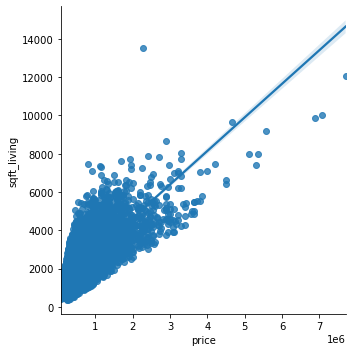

In [40]:
sns.lmplot(x="price", y="sqft_living", data=df)

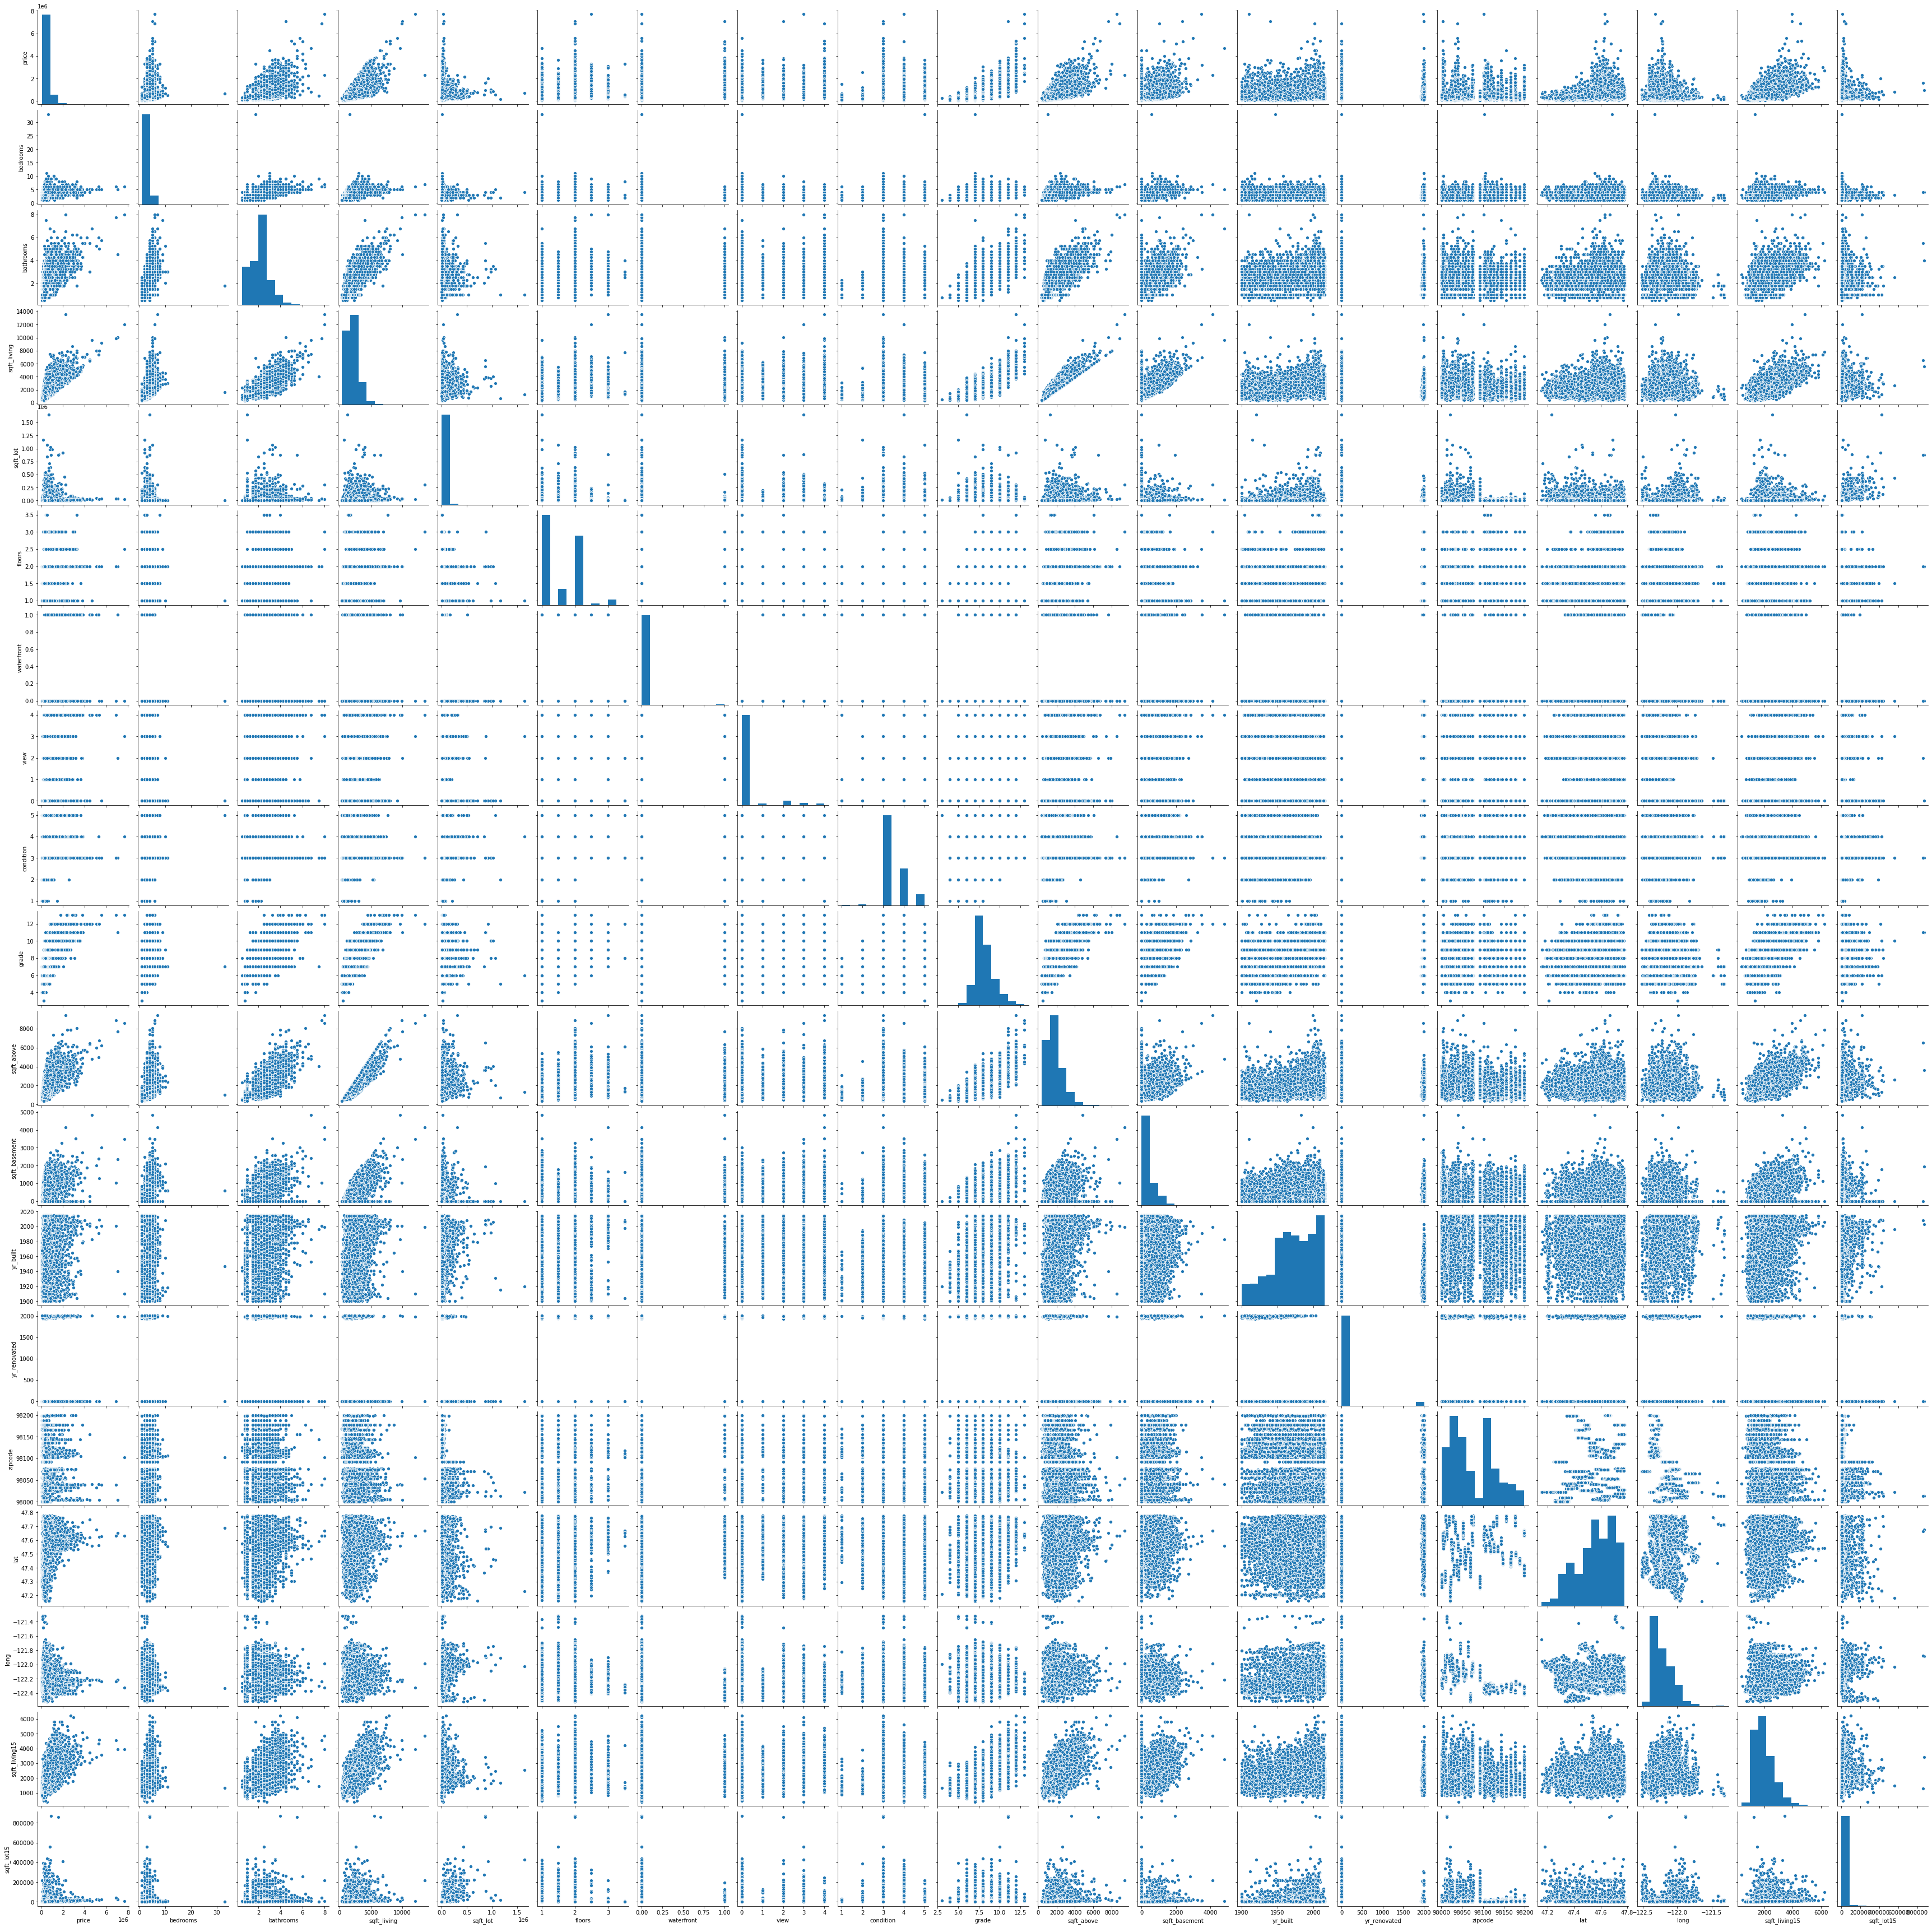

In [41]:
# start with a pairplot
sns.pairplot(df)

## Getting some basic statistics

In [42]:
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21143.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,291.85,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,442.50,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


<strong>Summery</strong>
1. The Datasaet has 20 columns and 21597 lines. 
2. All dates are machine readable: int64, float64 and date.
3. All columns are named, as they should.